In [1]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

## Методы оптимизации
Как вам показали на лекции, большинство методов машинного обучения сводятся к простому поиску параметров, который бы минимизировал ошибку на тренировочной выборке:
$$
min_{\theta}L(p_{\theta}(x), y)
$$
Здесь:
* $L$ - некоторый лосс,
* $p_{\theta}$ - нейронная сеть с параметрами $\theta$
* x - данные для обучения,
* y - ответы

Напишем алгоритм для поиска минимума некоторой функции
$$
f(x) = x^{3} + 2x^{2} + 2
$$

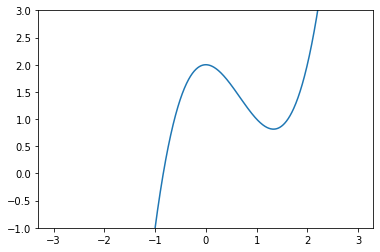

In [3]:
# Наша функция f(x)
func = lambda x: x ** 3 - 2*x ** 2 + 2
# Производная функции f(x)
d_func = lambda x: 3 * x ** 2 - 4 * x
# Сделаем массив из 1000 элементов от -3 до 3
x = np.linspace(-3, 3, 1000)
# Определим границы по y для графика
plt.ylim([-1, 3])
plt.plot(x, func(x))
plt.show()

Определим функцию для оптимизации $f(x)$, которая должна принимать на вход learning rate, максимальное количество итераций

In [4]:
def find_minimum_first_order(
    learning_rate=0.01,
    eps=1e-4,
    max_iterations=1000,
    anneal_learning_rate=None
):
    i = 0
    x_old, x_new = 0, 2
    # Будем сохранять обновлённые значения x и y
    x_list, y_list = [x_old], [func(x_old)]
    if not anneal_learning_rate:
        anneal_learning_rate = lambda lr, step: lr

    while abs(x_old - x_new) > eps and i < max_iterations:
        learning_rate = anneal_learning_rate(learning_rate, step=i)
        
        x_old = x_new
        print(x_new)
        x_new = x_old - learning_rate * d_func(x_old)
        x_list.append(x_new)
        y_list.append(func(x_new))
        i += 1
    # TODO:
    # Your code here
    # --------------
    # With these commands append new values to lists
    # x_list.append(x_new)
    # y_list.append(func(x_new))
    # --------------
    print("Найденный локальный минимум:", x_new)
    print("Количество шагов:", len(x_list))
    # Визуализируем сходимость
    plt.figure(figsize=[6, 4])
    plt.ylim([-3, 8])
    print(x_list, y_list)
    plt.scatter(x_list[:len(y_list)], y_list, c="r", edgecolors='k')
    plt.plot(x_list[:len(y_list)], y_list, c="r")
    plt.plot(x, func(x), c="b")
    plt.title("Descent trajectory")
    plt.show()

Попробуем различные learning rate и посмотрим на поведение оптимизации

2
1.996
1.992031952
1.9880955059146332
1.984190316716378
1.9803160443443903
1.9764723536153044
1.9726589141359487
1.9688754002179325
1.9651214907940542
1.9613968693364885
1.9577012237767055
1.954034246427082
1.9503956339041606
1.94678508705352
1.943202310876212
1.9396470144567328
1.936118910892487
1.9326177172247103
1.9291431543708166
1.9256949470581326
1.9222728237589894
1.9188765166271384
1.9155057614354576
1.9121602975149221
1.9088398676948046
1.9055442182440805
1.9022730988140064
1.8990262623818481
1.8958034651957276
1.8926044667205661
1.8894290295850964
1.88627691952992
1.8831479053565858
1.8800417588776654
1.8769582548678045
1.8738971710157266
1.8708582878771673
1.86784138882872
1.8648462600225701
1.8618726903421
1.8589204713583432
1.8559893972872712
1.853079264947892
1.8501898737211442
1.847321025509568
1.8444725246977371
1.8416441781134336
1.83883579498955
1.8360471869267037
1.8332781678565462
1.830528554005754
1.827798163860686
1.8250868181326911
1.8223943397240567
1.819720553

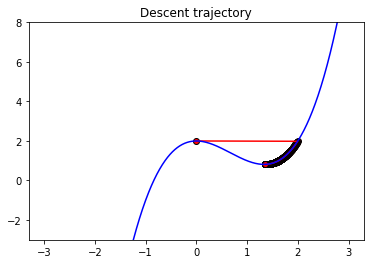

In [5]:
find_minimum_first_order(0.001)

Слишком мало, будем очень долго идти к локальному минимуму

2
1.96
1.923152
1.88912267154688
1.8576240443641827
1.8284059934327517
1.8012501788654376
1.775965119814172
1.7523821614028419
1.7303521506708686
1.7097426797377644
1.6904357859997687
1.6723260230420998
1.6553188341434695
1.6393291742291054
1.6242803369539092
1.6101029520416124
1.5967341246380835
1.5841166936800946
1.5721985904514197
1.5609322818349536
1.5502742854541174
1.5401847460680738
1.5306270643501734
1.5215675706205434
1.512975237286442
1.5048214247186407
1.497079656098619
1.489725417441433
1.4827359795579587
1.476090239188006
1.469768576928743
1.4637527299140785
1.458025677480714
1.4525715382941498
1.4473754776100487
1.4424236235188432
1.43770299116904
1.4332014140913094
1.428907481854362
1.4248104833775552
1.42090035530638
1.4171676349273412
1.4136034171598681
1.4101993152160812
1.4069474245656473
1.4038402898835158
1.4008708746938494
1.398032533454638
1.3953189858548958
1.3927242931204775
1.3902428361458585
1.3878692952880465
1.3855986316754683
1.3834260698994592
1.381347081

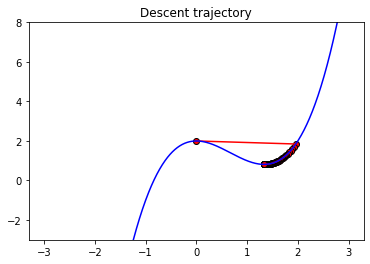

In [6]:
find_minimum_first_order(0.01)

Уже лучше

2
0.8
1.184
1.3431296
1.3312877098434561
1.3337386919133927
1.3332521137333009
Найденный локальный минимум: 1.3333495713163788
Количество шагов: 8
[0, 0.8, 1.184, 1.3431296, 1.3312877098434561, 1.3337386919133927, 1.3332521137333009, 1.3333495713163788] [2, 1.2319999999999998, 0.8560855040000002, 0.8150076886127855, 0.8148231754056736, 0.8148151435125781, 0.8148148280075258, 0.8148148153421633]


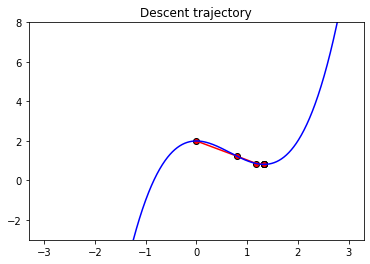

In [7]:
find_minimum_first_order(0.3)

In [8]:
find_minimum_first_order(0.6)

2
-0.3999999999999999
-1.6479999999999995
-10.491827199999996
-233.8134008703875
-99198.63713079707
-17713002570.859837
-5.647508281957411e+20
-5.740982963059958e+41
-5.932599368786045e+83


OverflowError: ignored

Ууупс, получили Overflow. Значит learning rate слишком большой. Хотя большой learning rate опасен возможностью overflow у него есть ряд преимуществ. Чем больше темп обучения, тем большие расстояния мы преодолеваем за один шаг и тем выше вероятность быстрее найти хорошее пространство локальных минимумов.

Хорошая стратегия — начинать с достаточно большого шага (чтобы хорошо попутешествовать по функции), а потом постепенно его уменьшать, чтобы стабилизировать процесс обучения в каком-то локальном минимуме.

2
1.28
1.2910592
1.2937117106658345
1.2944590662624014
1.2946791709613663
Найденный локальный минимум: 1.294744839667743
Количество шагов: 7
[0, 1.28, 1.2910592, 1.2937117106658345, 1.2944590662624014, 1.2946791709613663, 1.294744839667743] [2, 0.8203520000000002, 0.818313471309998, 0.8178923598654655, 0.8177784849671359, 0.8177453484570028, 0.8177354974621776]


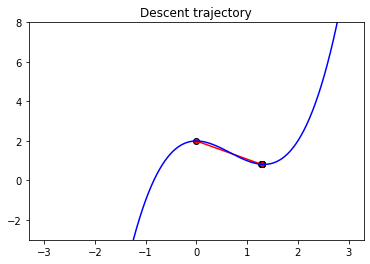

In [9]:
find_minimum_first_order(0.6, anneal_learning_rate=lambda lr, step: 0.3 * lr)

# Описание алгоритмов градиентного спуска

### SGD
SGD - этот же самый gradient descent, что мы рассматривали ранее, вот только подсчёт градиентов производится не по всему множеству данных, а по отдельно взятому сэмплу. Очевидно, такая оптимизация будет очень шумной, что усложнит обучение модели. Поэтому обычно используют MiniBatch-SGD, где вместо одного сэмпла мы берём K. У такого подхода есть несколько плюсов:
* ниже variance в сравнении с обычной SGD, что приводит к более стабильному процессу оптимизации
* хорошо работает с DL библиотеками, так как теперь мы работаем с матрицами

$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

### SGD with Momentum
Попытаемся добавить SGD эффект инерции. Теперь, вместо того чтобы двигаться строго в направлении градиента в каждой точке, мы стараемся продолжить движение в том же направлении, в котором двигались ранее. То есть у нашей точки, которая спускается по многомерной поверхности, появляется импульс (momentum), который контролируется при помощи параметра $\alpha$. Он определяет какую часть прошлого градиента мы хотим использовать на текущем шаге.
$$
\begin{eqnarray}
g_{t} &=& \alpha g_{t-1} + \eta \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

## Адаптивные варианты градиентного спуска
Во всех предыдущих алгоритмах у нас был фиксированный learning rate. Начиная с Adagrad у нас будет идти алгоритмы, которые подстраивают learning rate в зависимости от обучения. Они называются адаптивными вариантами градиентного спуска.

Адаптивные варианты градиентного спуска подстраивает темп обучения таким образом, чтобы делать большие или маленькие обновления отдельных параметров. Например, может так сложиться, что некоторые веса близки к своим локальным минимумам, тогда по этим координатам нужно двигаться медленнее, а другие веса ещё только в середине, значит их можно менять гораздо быстрее. Подобные методы часты приводят к более обоснованной модели и сходятся гораздо быстрее.

### Adagrad
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& s + diag(gg {T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$
Теперь нам не нужно сильно волноваться о правильном подборе $\eta$, так как $s$ контролирует скорость обучения для каждого параметра.

### RMSprop
У Adagrad есть сильный минус. $s$ - всегда положительна и постоянно растёт во время обучения, что приводит к ситуации, когда у нас learning rate становится слишком маленький, и мы перестаём учиться. RMSprop исправляет эту проблему при помощи экспоненциального сглаживания
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& \rho s + (1 - \rho) diag(gg {T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$

### Adam
Добавим не только моменты второго порядка, но и первого при обновлении параметров
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) diag(gg {T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1 {t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2 {t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

# PyTorch Optimizer
Очевидно, что для своих нейронных сетей не нужно каждый раз писать свой алгоритм и за вас уже сделаны все самые популярные методы. Их можно найти в **torch.optim**.

In [10]:
dir(torch.optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

Основные функции PyTorch Optimizer:
* __step__ - обновление весов модели
* __zero_grad__ - занулить веса модели (по умолчанию градиенты в PyTorch аккумулируются) ~ `for each param in params: param.grad = None`
* __state_dict__ - получить текущее состояние Optimizer. Для адаптивных методов тут будут храниться аккумулированные квадраты градиентов

## Как сделать instance PyTorch Optimizer?
Достаточно передать параметры модели (их можно получить при помощи функции `parameters()`) и гипер-параметоры для метода оптимизации.

Пример:

In [11]:
?torch.optim.SGD

In [12]:
model = torch.nn.Linear(1, 1)
list(model.parameters()), torch.optim.SGD(model.parameters(), lr=0.01)

([Parameter containing:
  tensor([[-0.6891]], requires_grad=True), Parameter containing:
  tensor([-0.1460], requires_grad=True)], SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.01
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

Или же вот так

In [13]:
# Зададим PyTorch модули в качестве словаря
model = torch.nn.ModuleDict({
    'linear_1': torch.nn.Linear(1, 1),
    'linear_2': torch.nn.Linear(2, 2)
})
torch.optim.SGD([
    {'params': model['linear_1'].parameters(), 'lr': 0.3},
    {'params': model['linear_2'].parameters()}
], lr=0.5)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.3
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    lr: 0.5
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Последнее очень полезно для Transfer Learning, когда мы хотим, чтобы предобученная модель тренировалась с другим learning rate

## Делаем свой Optimizer
Для того чтобы сделать свой Optimizer, не нужно писать свою имплементацию каждой из основных функций. Достаточно переопределить только одну из них - **step**.

Попробуем реализовать несколько своих Optimizer. В качестве данных для модели воспользуемся `make_regression` из `sklearn`.

In [14]:
from sklearn.datasets import make_regression


def seed_everything(seed: int):
    # Зафиксировать seed.
    # Это понадобится, чтобы убедиться
    # в правильности работы нашего Optimizer
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


# make_regression возвращает 2 переменные: данные и таргет для них
# так как они возвращаётся как np.array,
# вызовем для каждого из них команду torch.from_numpy
X, y = map(
    lambda x: torch.from_numpy(x).float(),
    make_regression(n_samples=200, n_features=2)
)


def get_model():
    # Таким образом, мы при каждом вызове будем получить
    # модель с одной и той же инициализацией весов
    seed_everything(13)
    return torch.nn.Sequential(
        torch.nn.Linear(2, 10),
        torch.nn.Linear(10, 1)
    )

Как мы заметили ранее Optimizer работает с группами параметров. Поэтому нам необходимо делать отдельно update для каждой группы параметров (-> ещё один for loop)

In [15]:
from torch.optim import Optimizer


class InClassOptimizer(Optimizer):
    def step(self):
        """Perform single optimization step."""
        with torch.no_grad(): # выключим градиенты
            for group in self.param_groups:
                self._group_step(group)

    def _group_step(self, group):
        # group ~ dict[str, ...]
        """
        Private helper function to perform
        single optimization step on model parameters.
        """
        raise NotImplementedError()

In [16]:
class Adagrad(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-13):
        defaults = dict(lr=lr, eps=eps)
        super().__init__(params, defaults)

    def _group_step(self, group):
        # One group contains information about values passed in init
        # and model parameters to update
        lr = group['lr']
        eps = group['eps']
        for param in filter(lambda x: x.grad is not None, group['params']):
            # TODO:
            # Your code here
            # --------------
            # --------------
            self._init_adagrad_buffer(param)
            d_param = param.grad
            buffer = self._get_adagrad_buffer(param)
            buffer.add_(d_param ** 2)
            d_param /= torch.sqrt(buffer + eps)
            param.add_(d_param, alpha=-lr)

    def _get_adagrad_buffer(self, param):
        param_state = self.state[param]
        return param_state['adagrad_buffer']
        
    def _init_adagrad_buffer(self, param):
        param_state = self.state[param]
        if 'adagrad_buffer' not in param_state:
            param_state['adagrad_buffer'] = torch.zeros_like(param)

In [17]:
def check_optimizer(model, optim, num_iter):
    loss = torch.nn.MSELoss()
    for i in range(num_iter):
        output = loss(model(X), y.unsqueeze(-1))
        output.backward()
        optim.step()
        optim.zero_grad()
        if i % 100 == 0:
            print(f'Iteration {i} loss:', output.item())

Проверим, что написанный Optimizer работает корректно

In [18]:
model = get_model()
optim = Adagrad(model.parameters(), lr=0.001)
check_optimizer(model, optim, num_iter=1000)

Iteration 0 loss: 356.07476806640625
Iteration 100 loss: 350.8880920410156
Iteration 200 loss: 348.6490173339844
Iteration 300 loss: 346.952392578125
Iteration 400 loss: 345.5332336425781
Iteration 500 loss: 344.2884826660156
Iteration 600 loss: 343.1659851074219
Iteration 700 loss: 342.13531494140625
Iteration 800 loss: 341.1767272949219
Iteration 900 loss: 340.27691650390625


In [19]:
model = get_model()
optim = torch.optim.Adagrad(model.parameters(), lr=0.001)
check_optimizer(model, optim, num_iter=1000)

Iteration 0 loss: 356.07476806640625
Iteration 100 loss: 350.8880920410156
Iteration 200 loss: 348.6490173339844
Iteration 300 loss: 346.952392578125
Iteration 400 loss: 345.5332336425781
Iteration 500 loss: 344.2884826660156
Iteration 600 loss: 343.1659851074219
Iteration 700 loss: 342.13531494140625
Iteration 800 loss: 341.1767272949219
Iteration 900 loss: 340.27691650390625


Почему такой большой лосс?

Если посмотреть на optim.state, то сразу становится ясно, что квадраты градиентов очень большие, следовательно, апдейт будет совсем небольшой.

Повысим learning rate и посмотрим на поведение модели.

In [20]:
model = get_model()
optim = Adagrad(model.parameters(), lr=0.1)
check_optimizer(model, optim, num_iter=1000)

Iteration 0 loss: 356.07476806640625
Iteration 100 loss: 0.00011063159763580188
Iteration 200 loss: 3.9855499380792025e-06
Iteration 300 loss: 0.00012135761062381789
Iteration 400 loss: 3.4319986298214644e-05
Iteration 500 loss: 8.418089691986097e-07
Iteration 600 loss: 1.8576349347654286e-08
Iteration 700 loss: 2.0896313845941705e-10
Iteration 800 loss: 6.323299522881243e-11
Iteration 900 loss: 6.323299522881243e-11


`Какая мораль?`

Даже если у вас есть методы с адаптивным градиентом спуском, полностью забывать о настройке learning rate не стоит.

## Сравнение методов оптимизации

In [21]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms


# Train data
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_dataloader = DataLoader(
    fashion_mnist_train, batch_size=128, shuffle=True, num_workers=2
)
# Validation data
fashion_mnist_eval = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
eval_dataloader = DataLoader(
    fashion_mnist_eval, batch_size=128, num_workers=2
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [22]:
from collections import defaultdict


idx_to_label = defaultdict(lambda: None, {
    0: "T-shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
})

In [23]:
class Accuracy:
    def __init__(self):
        self._all_predictions = torch.LongTensor()
        self._all_labels = torch.LongTensor()

    def __call__(self, predictions, labels):
        # predictions ~ (batch size)
        # labels ~ (batch size)
        self._all_predictions = torch.cat([
            self._all_predictions,
            predictions
        ], dim=0)
        self._all_labels = torch.cat([
            self._all_labels,
            labels
        ], dim=0)

    def get_metric(self, reset=False):
        correct = (self._all_predictions == self._all_labels).long()
        accuracy = correct.sum().float() / self._all_labels.size(0)
        if reset:
            self.reset()
        return accuracy

    def reset(self):
        self._all_predictions = torch.LongTensor()
        self._all_labels = torch.LongTensor()

# Модель

1. BatchNorm
2. Conv(out=32, kernel=3) -> ReLu -> MaxPool(kernel=2)
3. Conv(out=64, kernel=3) -> ReLu -> MaxPool(kernel=2)
4. Flatten
5. Linear(out=128)
6. ReLu
7. Dropout
8. Linear(out=64)
9. ReLu
10. Linear(out=10)

In [39]:
class SimpleNetEncoder(torch.nn.Module):
    # Можно также сделать SimpleNetEncoder TODO
    def __init__(self, dropout=0.4):
        super().__init__()
        # TODO:
        # Your code here:
        # --------------
        # --------------
        self.init_bn = torch.nn.BatchNorm2d(1)
        self.conv1 = torch.nn.Conv2d(1, 32, 3) # (28 - (3 - 1)) = 26
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(2) # 13
        self.conv2 = torch.nn.Conv2d(32, 64, 3) # 11; 5

        self.fc1 = torch.nn.Linear(64 * 5 * 5, 128)
        self.drop = torch.nn.Dropout(dropout)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        # x ~ (batch size, num channels, height, width)
        # TODO:
        # Your code here:
        # --------------
        # --------------
        x = self.init_bn(x)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.drop(self.relu(self.fc1(x)))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class SimpleNet(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self._encoder = encoder
        self._accuracy = Accuracy()

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._encoder(images)
        output_dict = {'logits': output, 'probs': torch.softmax(output, dim=-1)}
        output_dict['preds'] = torch.argmax(output_dict['probs'], dim=-1)
        if target is not None:
            log_softmax = torch.log_softmax(output, dim=-1)
            output_dict['loss'] = F.nll_loss(log_softmax, target)
            self._accuracy(
                output_dict['preds'].cpu(),
                target.cpu()
            )
        return output_dict

    def decode(self, output_dict):
        # output_dict ~ dict with torch.Tensors (output_dict from forward)
        return [idx_to_label[int(x)] for x in output_dict['preds']]

    def get_metrics(self, reset=False):
        return {'accuracy': self._accuracy.get_metric(reset)}

In [35]:
def train_epoch(
    model,
    data_loader,
    optimizer,
    return_losses=False,
    device='cuda:0',
):
    model = model.train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for batch in data_loader:
            # Move Batch to GPU
            batch = [x.to(device=device) for x in batch]
            output_dict = model(*batch)
            loss = output_dict['loss']
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            metrics = model.get_metrics()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(metrics['accuracy'].item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update(model.get_metrics(reset=True))
    if return_losses:
        return metrics, all_losses
    else:
        return metrics


def validate(model, data_loader, device='cuda:0'):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for batch in data_loader:
            batch = [x.to(device=device) for x in batch]
            output_dict = model(*batch)
            loss = output_dict['loss']
            metrics = model.get_metrics()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(metrics['accuracy'].item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update(model.get_metrics(reset=True))
    return metrics

In [36]:
from collections import namedtuple


LossInfo = namedtuple(
    'LossInfo', 
    ['full_train_losses', 'train_epoch_losses', 'eval_epoch_losses']
)


EPOCHS = 10
LR = 0.001

In [37]:
def fit(
    model,
    epochs,
    train_data_loader,
    validation_data_loader,
    optimizer
):
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(epochs):
        # Train step
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_epoch(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            return_losses=True,
        )
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics['loss'])
        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            validation_metrics = validate(
                model=model,
                data_loader=validation_data_loader,
            )
        # Save eval losses
        epoch_eval_losses.append(validation_metrics['loss'])
    return LossInfo(all_train_losses, epoch_train_losses, epoch_eval_losses)

SGD

In [40]:
model = SimpleNet(encoder=SimpleNetEncoder()).to(device='cuda:0')
sgd_loss_info = fit(
    model=model,
    epochs=EPOCHS,
    train_data_loader=train_dataloader,
    validation_data_loader=eval_dataloader,
    optimizer=torch.optim.SGD(model.parameters(), lr=LR)
)

Train Epoch: 0
Loss: 2.2902 Accuracy: 11.105: 100%|██████████| 469/469 [00:12<00:00, 38.94it/s]
Validation Epoch: 0
Loss: 2.3003 Accuracy: 18.41: 100%|██████████| 79/79 [00:01<00:00, 46.21it/s]
Train Epoch: 1
Loss: 2.2678 Accuracy: 16.84: 100%|██████████| 469/469 [00:12<00:00, 38.33it/s]
Validation Epoch: 1
Loss: 2.2654 Accuracy: 26.33: 100%|██████████| 79/79 [00:01<00:00, 47.61it/s]
Train Epoch: 2
Loss: 2.1941 Accuracy: 24.985: 100%|██████████| 469/469 [00:12<00:00, 39.07it/s]
Validation Epoch: 2
Loss: 2.2023 Accuracy: 38.47: 100%|██████████| 79/79 [00:01<00:00, 48.38it/s]
Train Epoch: 3
Loss: 2.0692 Accuracy: 35.72: 100%|██████████| 469/469 [00:12<00:00, 38.31it/s]
Validation Epoch: 3
Loss: 2.0433 Accuracy: 46.44: 100%|██████████| 79/79 [00:01<00:00, 47.17it/s]
Train Epoch: 4
Loss: 1.7017 Accuracy: 40.095: 100%|██████████| 469/469 [00:12<00:00, 38.57it/s]
Validation Epoch: 4
Loss: 1.6293 Accuracy: 45.34: 100%|██████████| 79/79 [00:01<00:00, 47.42it/s]
Train Epoch: 5
Loss: 1.3517 Accu

SGD with Momentum

In [41]:
model = SimpleNet(encoder=SimpleNetEncoder()).to(device='cuda:0')
sgd_momentum_loss_info = fit(
    model=model,
    epochs=EPOCHS,
    train_data_loader=train_dataloader,
    validation_data_loader=eval_dataloader,
    optimizer=torch.optim.SGD(model.parameters(), momentum=0.9, lr=LR)
)

Train Epoch: 0
Loss: 1.1055 Accuracy: 34.62: 100%|██████████| 469/469 [00:12<00:00, 38.01it/s]
Validation Epoch: 0
Loss: 0.828 Accuracy: 66.53: 100%|██████████| 79/79 [00:01<00:00, 50.74it/s]
Train Epoch: 1
Loss: 0.8432 Accuracy: 69.2133: 100%|██████████| 469/469 [00:12<00:00, 38.85it/s]
Validation Epoch: 1
Loss: 0.512 Accuracy: 72.72: 100%|██████████| 79/79 [00:01<00:00, 48.39it/s]
Train Epoch: 2
Loss: 0.6862 Accuracy: 75.6017: 100%|██████████| 469/469 [00:11<00:00, 39.25it/s]
Validation Epoch: 2
Loss: 0.4332 Accuracy: 78.59: 100%|██████████| 79/79 [00:01<00:00, 50.36it/s]
Train Epoch: 3
Loss: 0.5034 Accuracy: 78.0617: 100%|██████████| 469/469 [00:11<00:00, 39.39it/s]
Validation Epoch: 3
Loss: 0.3707 Accuracy: 80.33: 100%|██████████| 79/79 [00:01<00:00, 50.40it/s]
Train Epoch: 4
Loss: 0.8496 Accuracy: 79.6333: 100%|██████████| 469/469 [00:11<00:00, 39.12it/s]
Validation Epoch: 4
Loss: 0.2941 Accuracy: 81.37: 100%|██████████| 79/79 [00:01<00:00, 49.48it/s]
Train Epoch: 5
Loss: 0.3363 A

RMSprop

In [42]:
model = SimpleNet(encoder=SimpleNetEncoder()).to(device='cuda:0')
rmsprop_loss_info = fit(
    model=model,
    epochs=EPOCHS,
    train_data_loader=train_dataloader,
    validation_data_loader=eval_dataloader,
    optimizer=torch.optim.RMSprop(model.parameters(), lr=LR)
)

Train Epoch: 0
Loss: 0.4855 Accuracy: 76.19: 100%|██████████| 469/469 [00:12<00:00, 38.60it/s]
Validation Epoch: 0
Loss: 0.2006 Accuracy: 84.26: 100%|██████████| 79/79 [00:01<00:00, 48.43it/s]
Train Epoch: 1
Loss: 0.3294 Accuracy: 84.8617: 100%|██████████| 469/469 [00:12<00:00, 38.55it/s]
Validation Epoch: 1
Loss: 0.1737 Accuracy: 87.05: 100%|██████████| 79/79 [00:01<00:00, 48.45it/s]
Train Epoch: 2
Loss: 0.187 Accuracy: 86.8583: 100%|██████████| 469/469 [00:12<00:00, 38.22it/s]
Validation Epoch: 2
Loss: 0.178 Accuracy: 88.26: 100%|██████████| 79/79 [00:01<00:00, 47.35it/s]
Train Epoch: 3
Loss: 0.3402 Accuracy: 88.0383: 100%|██████████| 469/469 [00:12<00:00, 37.38it/s]
Validation Epoch: 3
Loss: 0.0642 Accuracy: 88.9: 100%|██████████| 79/79 [00:01<00:00, 49.46it/s]
Train Epoch: 4
Loss: 0.2901 Accuracy: 89.0267: 100%|██████████| 469/469 [00:12<00:00, 38.77it/s]
Validation Epoch: 4
Loss: 0.1801 Accuracy: 88.46: 100%|██████████| 79/79 [00:01<00:00, 49.87it/s]
Train Epoch: 5
Loss: 0.421 Acc

Adam

In [43]:
model = SimpleNet(encoder=SimpleNetEncoder()).to(device='cuda:0')
adam_loss_info = fit(
    model=model,
    epochs=EPOCHS,
    train_data_loader=train_dataloader,
    validation_data_loader=eval_dataloader,
    optimizer=torch.optim.Adam(model.parameters(), lr=LR)
)

Train Epoch: 0
Loss: 0.4335 Accuracy: 76.975: 100%|██████████| 469/469 [00:12<00:00, 37.59it/s]
Validation Epoch: 0
Loss: 0.2363 Accuracy: 84.57: 100%|██████████| 79/79 [00:01<00:00, 47.73it/s]
Train Epoch: 1
Loss: 0.2615 Accuracy: 85.725: 100%|██████████| 469/469 [00:12<00:00, 38.38it/s]
Validation Epoch: 1
Loss: 0.2121 Accuracy: 87.78: 100%|██████████| 79/79 [00:01<00:00, 49.69it/s]
Train Epoch: 2
Loss: 0.4289 Accuracy: 87.6267: 100%|██████████| 469/469 [00:12<00:00, 37.85it/s]
Validation Epoch: 2
Loss: 0.1285 Accuracy: 88.74: 100%|██████████| 79/79 [00:01<00:00, 48.69it/s]
Train Epoch: 3
Loss: 0.3452 Accuracy: 89.0933: 100%|██████████| 469/469 [00:12<00:00, 37.71it/s]
Validation Epoch: 3
Loss: 0.1767 Accuracy: 89.01: 100%|██████████| 79/79 [00:01<00:00, 48.48it/s]
Train Epoch: 4
Loss: 0.3761 Accuracy: 89.8033: 100%|██████████| 469/469 [00:12<00:00, 37.96it/s]
Validation Epoch: 4
Loss: 0.1631 Accuracy: 89.75: 100%|██████████| 79/79 [00:01<00:00, 47.91it/s]
Train Epoch: 5
Loss: 0.3431

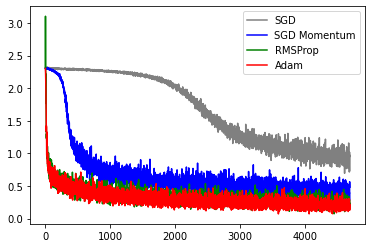

In [44]:
plt.plot(
    np.arange(len(train_dataloader) * 10),
    sgd_loss_info.full_train_losses,
    label='SGD', c='grey'
)
plt.plot(
    np.arange(len(train_dataloader) * 10),
    sgd_momentum_loss_info.full_train_losses,
    label='SGD Momentum', c='blue'
)
plt.plot(
    np.arange(len(train_dataloader) * 10),
    rmsprop_loss_info.full_train_losses,
    label='RMSProp', c='green'
)
plt.plot(
    np.arange(len(train_dataloader) * 10),
    adam_loss_info.full_train_losses,
    label='Adam', c='red'
)
plt.legend()
plt.show()

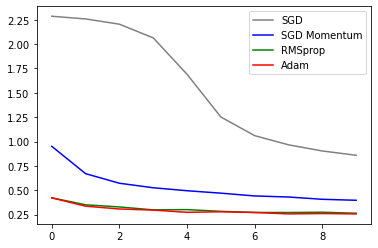

In [45]:
plt.plot(
    np.arange(10), sgd_loss_info.eval_epoch_losses,
    label='SGD', c='grey'
)
plt.plot(
    np.arange(10), sgd_momentum_loss_info.eval_epoch_losses,
    label='SGD Momentum', c='blue'
)
plt.plot(
    np.arange(10), rmsprop_loss_info.eval_epoch_losses,
    label='RMSprop', c='green'
)
plt.plot(
    np.arange(10), adam_loss_info.eval_epoch_losses,
    label='Adam', c='red'
)
plt.legend()
plt.show()

## Оптимизация второго порядка
Теперь вернёмся немного назад к функции $f(x)$ и рассмотрим оптимизацию второго порядка. Вместо того чтобы приближать функцию в текущей точке линейно можно это делать при помощи квадратов.

In [ ]:
d_2_func = lambda x: 6 * x - 4

In [ ]:
def find_minimum_second_order(eps=1e-4, max_iterations=1000):
    i = 0
    x_old, x_new = 0, 2
    x_list, y_list = [x_old], [func(x_old)]
    while abs(x_new - x_old) > eps and i < max_iterations:
        # Обновим x_old
        x_old = x_new
        # Сделаем один шаг gradient descent со 2 порядком градиентов
        x_new = x_old - d_func(x_old) / d_2_func(x_old)
        # Сохраним значения для визуализации
        x_list.append(x_new)
        y_list.append(func(x_new))
        i += 1
    print("Найденный локальный минимум:", x_new)
    print("Количество шагов:", len(x_list))
    # Визуализируем сходимость
    plt.figure(figsize=[6, 4])
    plt.ylim([-3, 8])
    plt.scatter(x_list, y_list, c="r", edgecolors="k")
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, func(x), c="b")
    plt.title("Descent trajectory")
    plt.show()

In [ ]:
find_minimum_second_order()

В итоге мы пришли к минимуму гораздо быстрее. И если же методы второго порядка такие крутые и быстрые, то почему их не используют в нейронных сетях? Для ответа на этот вопрос сначала рассмотрим плюсы и минусы данного подхода.

Плюсы методов второго порядка:
* Быстрее, чем методы оптимизации первого порядка
* Нет необходимости настраивать learning_rate

Можете ли вы предположить минусы методов оптимизации второго порядка или же просто методов Ньютона?

Ответ:
* Сложность вычисления градиента второго порядка
* В многомерном случае необходимо хранить матрицу размерности N x N

Проблема с памятью наиболее острая, так как современные нейронные сети имеют миллионы параметров и хранить матрицу миллион на миллион очень сложно.

## Зачем мы вообще начали разговор о 2 порядке?
Ответ в том, что методы с адаптивными градиентным являются аппроксимацией методов 2 порядка. Отсюда становится понятно, почему мы делим на матрицу квадратов в Adagrad и других его модификациях
$$
\mathbb{E}[gg {T}] = \mathbb{E}[H(x)]
$$
Здесь:
* $gg {T}$ - квадратная матрица квадратов градиентов
* $\mathbb{E}[H(x)]$ - ожидаемое значение Гессиана (матрица градиентов 2 порядка). В адаптивном градиенте разница лишь в том, что мы берём $\sqrt{diag(gg {T})}$, так как $gg {T}$ занимает слишком много места.